In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("music.csv")

In [3]:
data.shape

(1000, 28)

In [4]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [5]:
data['label'].value_counts()

disco        100
rock         100
reggae       100
classical    100
jazz         100
blues        100
hiphop       100
country      100
metal        100
pop          100
Name: label, dtype: int64

In [6]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['label']= label_encoder.fit_transform(data['label']) 
data['filename']=label_encoder.fit_transform(data['filename'])  
data['label'].unique() 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
X = data.drop('label', axis=1)
X= data.drop('filename',axis=1)
y = data['label']

In [8]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,0
1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,0
2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,0
3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,0
4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,0


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

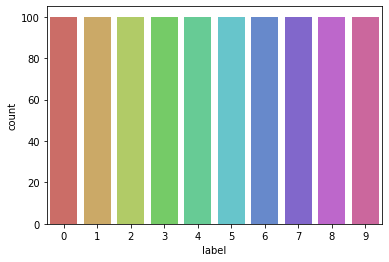

In [10]:
#display and labels along with the count
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' , data= data, palette = 'hls')
plt.show()

In [11]:
#dividing the dataset into 80% training data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [15]:
#VALUE OF LAMBDA 0.01
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.01)
svclassifier.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred = svclassifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[24  0  2  0  0  0  0  0  0  0]
 [ 1 18  1  0  0  0  0  0  0  0]
 [ 3  0 11  2  0  0  0  0  0  0]
 [ 0  0  2 17  3  0  0  0  0  0]
 [ 0  0  0  6 15  0  3  0  0  0]
 [ 0  0  0  3  2 12  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  1  0 15  3  0]
 [ 0  0  0  0  0  0  0  1 19  1]
 [ 0  0  0  0  0  0  0  3  5 10]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       1.00      0.90      0.95        20
           2       0.69      0.69      0.69        16
           3       0.61      0.77      0.68        22
           4       0.75      0.62      0.68        24
           5       0.92      0.71      0.80        17
           6       0.85      1.00      0.92        17
           7       0.79      0.79      0.79        19
           8       0.70      0.90      0.79        21
           9       0.91      0.56      0.69        18

    accuracy                           0.79       200
   macro avg       

(10.0, 0.0)

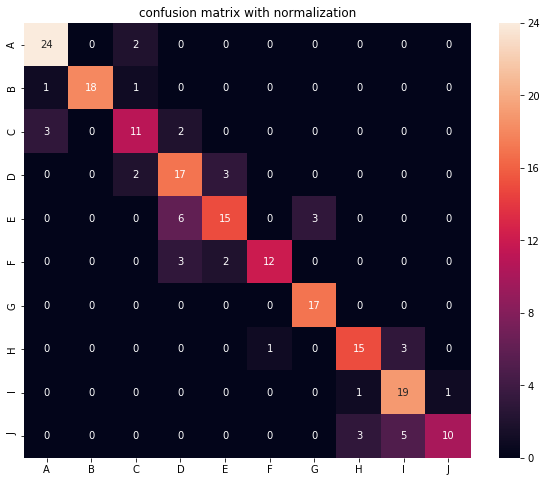

In [19]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix with normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
#VALUE OF LAMBDA 0.05
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.05)
svclassifier.fit(X_train, y_train)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred = svclassifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[26  0  0  0  0  0  0  0  0  0]
 [ 1 18  1  0  0  0  0  0  0  0]
 [ 2  0 13  1  0  0  0  0  0  0]
 [ 0  0  4 18  0  0  0  0  0  0]
 [ 0  0  0  7 15  1  1  0  0  0]
 [ 0  0  0  0  4 13  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 15  4  0]
 [ 0  0  0  0  0  0  0  1 18  2]
 [ 0  0  0  0  0  0  0  2  6 10]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.90      0.95        20
           2       0.72      0.81      0.76        16
           3       0.69      0.82      0.75        22
           4       0.79      0.62      0.70        24
           5       0.93      0.76      0.84        17
           6       0.94      1.00      0.97        17
           7       0.83      0.79      0.81        19
           8       0.64      0.86      0.73        21
           9       0.83      0.56      0.67        18

    accuracy                           0.81       200
   macro avg       

In [23]:
from sklearn.metrics import confusion_matrix 
confmat = confusion_matrix(y_test,y_pred)
print(confmat)

[[26  0  0  0  0  0  0  0  0  0]
 [ 1 18  1  0  0  0  0  0  0  0]
 [ 2  0 13  1  0  0  0  0  0  0]
 [ 0  0  4 18  0  0  0  0  0  0]
 [ 0  0  0  7 15  1  1  0  0  0]
 [ 0  0  0  0  4 13  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 15  4  0]
 [ 0  0  0  0  0  0  0  1 18  2]
 [ 0  0  0  0  0  0  0  2  6 10]]


(10.0, 0.0)

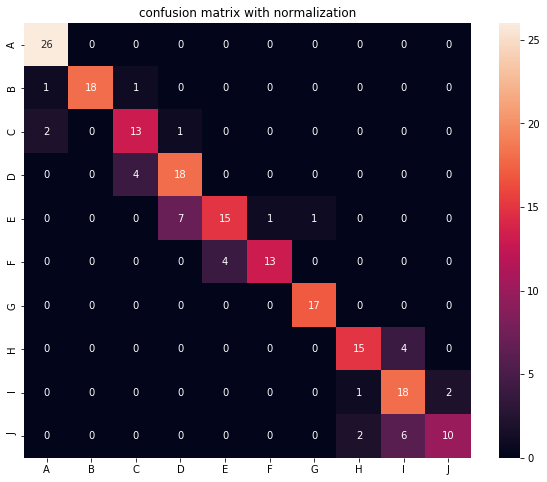

In [24]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix with normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)